## Naive Bayes

In [2]:
import numpy as np
import pandas as pd
from numpy import array

In [43]:
class NaiveBayes:
    def __init__(self):
        pass

    def fit(self, X: array, y: array)->None:
        n_samples, n_features = X.shape
        self.cls:array=np.unique(y)
        n_cls=len(self.cls)

        self.mean = np.zeros((n_cls, n_features), dtype=np.float64)
        self.var = np.zeros((n_cls, n_features), dtype=np.float64)
        self.prior = np.zeros(n_cls, dtype=np.float64)
        
        dt=np.concatenate((X, y), axis=1)

        for i, c in enumerate(self.cls):
            X_c=dt[dt[:, -1]==c][:, :-1]
            self.mean[i, :]=X_c.mean(axis=0)
            self.var[i, :]=X_c.var(axis=0)
            self.mean[i, :]=X_c.mean(axis=0)
            self.prior[i]=X_c.shape[0]/n_samples 

    def predict(self, X: array)->array:
        return np.array([self.make_pred(x) for x in X])

    def make_pred(self, x: array)->str:
        p=[]
        for i, c in enumerate(self.cls):
            prior=np.log(self.prior[i])
            posterior=np.sum(np.log(self.pdf(i, x)))
            p.append(prior+posterior)
        
        return self.cls[np.argmax(p)]
    
    def pdf(self, c_idx, x):
        mean=self.mean[c_idx]
        var=self.var[c_idx]

        num=np.exp(-(x-mean)**2/(2*var))
        denom=np.sqrt(2*np.pi*var)

        return num/denom
            

In [57]:
df=pd.read_csv('apple_quality.csv')
X=df.iloc[:, :-1].values
y=df.iloc[:, -1].values.reshape(-1, 1)

In [58]:
dt=np.concatenate((X, y), axis=1)

In [59]:
classifier=NaiveBayes()

In [60]:
classifier.fit(X, y)

In [61]:
y_pred=classifier.predict(X).reshape(-1, 1)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y, y_pred))

[[1497  499]
 [ 494 1510]]


In [65]:
print(accuracy_score(y, y_pred))

0.75175


<AxesSubplot:>

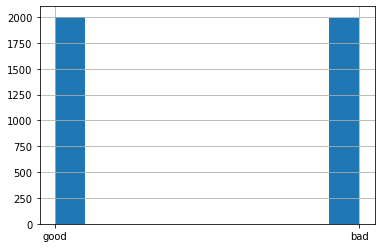

In [68]:
df['Quality'].hist()